# Time Series 1
### 1. Some basic concepts

- (1) Stochastic Processes

- (2) Random Walk Models (Unit root processes)
    
- (3) Spurious Regression

- (4) Unit root test



(1) Stochastic Processes
   - Stochastic (Random) Process: sequence of random variables ordered in time.
   - Notations: Let $Y$ be a random variable,
       - continuous : $Y(t)$
       - discrete : $Y_t$
   - Stationary processes: A stochastic process is said to be (weakly) stationary if
       - $E(y_t) = \mu$ : Mean is constant over time.
       - $Var(y_t) = E(Y_t - \mu)^2 = \sigma^2$ : Variance is constant over time.
       - $Cov(y_t, y_{t-p}) = Cov(y_s, y_{s-p})$ : The covariance between two time periods only depend on the distance/lag between the two time periods.
       
   - ex) $u_t \sim \text{i.i.d  } N(0, \sigma^2)$ (White noise process)
   
   - Most statistical models assume stationary time series, why?
   
   - Stationarity ensures that the observations are generated by a fixed distribution. 
   
   - If the underlying distribution changes over time, or in other words, if the time series is non-stationary then its behavior is not generalizable. 
   
(2) Random Walk Models (Unit root processes)

   - Random walk without a drift (no intercept term)
       - Time series $Y_t$ is said to be a random walk without drift, if $Y_t = Y_{t-1} + u_t$.
       
   - Random walk with drift (intercept term)
       - $Y_t = \mu + Y_{t-1} + u_t$
       
   - The mean of the process is affected by the intercept term(drift), while the variance increases indefinitely in both cases.
       
       
(Note) Backshift operator / Lag operator

   - The backshift operator (B) or lag operator (L) operates on an element of a time series to produce the previous element. 
   - For example, given some time series $X_t$, then $LX_t = X_{t-1}$. 
   - $(1-L)X_t = X_t - X_{t-1}$
   
   
(3) Spurious Regression
   - Integrated Process $I(1)$: $(1-L)X_t = \text{ARMA(p,q)}$
   - Two $I(1)$ processes could exhibit significant correlation, without an underlying relationship

In [2]:
#Spurious regression 이 회귀분석은 무효임.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

np.random.seed(10)
temp = np.random.normal(size=500)
y = np.cumsum(temp) #CUMSUM함으로써 non-stationary한 자료로 만듦
np.random.seed(20)
temp = np.random.normal(size=500)
X = np.cumsum(temp) #CUMSUM함으로써 non-stationary한 자료로 만듦
reg = sm.OLS(y, sm.add_constant(X)).fit()
reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     1039.
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          5.99e-124
Time:                        22:45:09   Log-Likelihood:                -1299.1
No. Observations:                 500   AIC:                             2602.
Df Residuals:                     498   BIC:                             2611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7612      0.176     55.471      0.000       9.415      10.107
x1             0.6986      0.022     32.231      0.000       0.656       0.741
==============================================================================
Omnibus:                       17.688   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.618
Skew:                          -0.465   Prob(JB):                     9.06e-05
Kurtosis:                       3.174   Cond. No.                         9.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(4) Unit root test

- In practice, we have two important questions:
    - How do we test if a given time series is stationary or not?
    - If the time series is non-stationary, can we make it stationary?
    
    
- The most popular unit root test is the Dickey-Fuller test
    - Let's start with $P_t = \rho P_{t-1}+u_t$
    - If $\rho=1$, then $P_t$ is a random walk.
    - $P_t = \rho P_{t-1}+u_t$
    - $\rightarrow$ $P_t - P_{t-1} = (\rho-1)P_{t-1} + u_t$
    - $\rightarrow$ $P_t - P_{t-1} = \delta P_{t-1} + u_t$ ($\delta = \rho$-1)
    - If $\delta = 0$ : $P_t$ is non-stationary
    - If $\delta < 0$ : $P_t$ is stationary
    - Under the null hypothesis that $\delta=0$, the estimated $t-$value follows the $\tau$ distribution.

(-1.332272990466535,
 0.6142811340797816,
 29,
 3444,
 {'1%': -3.432250168606461,
  '5%': -2.862379585586576,
  '10%': -2.5672169267193294},
 51844.5145864355)

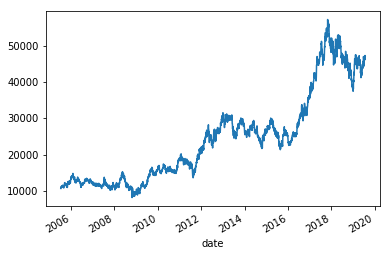

In [3]:
# Test of the EMH on Samsung electronics
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('005930_daily.txt', sep = '\t', index_col=0, parse_dates=True)
df.close.plot()
adfuller(df.close, regression='c') #1번째 결과 : test statistics , 2번째 결과 : p-value

In [16]:
# NON-stationary한 data를 stationary하게 하는 법

df['close'].diff() #현재값에서 직전 값뺴주거나
df['close'].pct_change() #변화율로 변경
print()

In [14]:
print(adfuller(df['close'].diff().dropna(), regression='c'))
print(adfuller(df['close'].pct_change().dropna(), regression='c'))

(-11.388495418855575, 8.177482396639191e-21, 28, 3444, {'1%': -3.432250168606461, '5%': -2.862379585586576, '10%': -2.5672169267193294}, 51829.8402816443)
(-29.696861827390503, 0.0, 4, 3468, {'1%': -3.432237008898008, '5%': -2.86237377283903, '10%': -2.567213832173279}, -17712.76782354763)
